In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2 as cv
import pandas as pd
#import pygame
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
from copy import deepcopy

In [20]:
def save_to_csv(k, infos):
    df = pd.read_csv('results.csv')

    df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"], 
                    'Correto': infos["Correto"], 'Diferença': infos["Diferença"], 'K': k}, ignore_index=True)
    df.to_csv('results.csv', index=False)


In [21]:
df = pd.read_csv('ratings_small.csv')
print(df.head(2))
df = df.pivot(index='userId',columns='movieId',values='rating')
df = df.replace(np.nan,0)
X = df.to_numpy()
X.shape

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179


(671, 9066)

In [22]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,:K]
    s_ = s[:K]
    vt_ = vt[:K,:]

    return u_, s_, vt_

In [23]:
X[0,30]

2.5

In [24]:
rating = np.random.randint(1,6)
print(rating)
i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating
X[i,j]

4


2.5

In [25]:
def predict(arr,k):
    u0, s0, vt0 = svd(arr)
    u1,s1,vt1 = comprimir(u0,s0,vt0,k)
    # u1,s1,vt1 = u0,s0,vt0
    sigma = diagsvd(s1, u1.shape[1], vt1.shape[0])
    Y = u1 @ sigma @ vt1
    Y = np.around(Y,5)
    return Y

In [26]:
u,s,vt = svd(X)

In [27]:
s

array([517.58313979, 243.76943485, 204.30617832, 162.47028777,
       156.30956977, 145.23455301, 136.81751883, 122.99256885,
       118.74152381, 116.32873458, 111.49367292, 105.79872672,
       105.22888405,  99.23143457,  97.28551406,  92.94461751,
        92.03785085,  91.66845354,  89.86862678,  88.6199206 ,
        87.28696703,  85.49577203,  84.4018213 ,  84.04184504,
        82.09439136,  81.97690614,  80.3072336 ,  79.9572191 ,
        79.22060121,  78.765595  ,  77.93137263,  77.41399697,
        76.41535328,  75.16819208,  75.00607014,  74.52580718,
        73.92886524,  73.18212044,  72.6081443 ,  72.37594771,
        71.83632747,  71.53824808,  71.15108016,  70.79173171,
        70.47873043,  69.36059605,  68.88086787,  68.46729698,
        67.902172  ,  67.70890378,  67.55712063,  66.9415601 ,
        66.7623694 ,  66.11353385,  65.77593494,  65.09363441,
        64.64400521,  64.32314536,  64.0518851 ,  64.01358834,
        63.5865328 ,  63.17365423,  62.47363085,  61.90

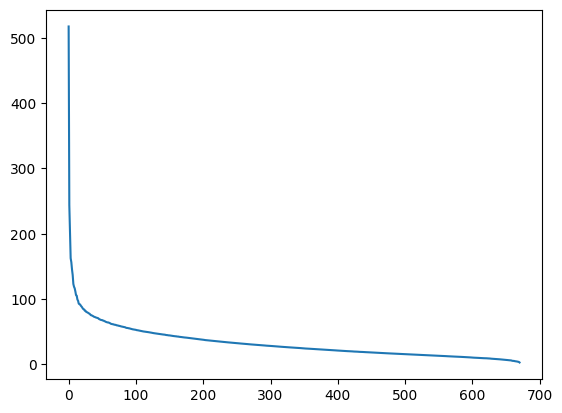

In [28]:
plt.figure()
plt.plot(s)
plt.show()

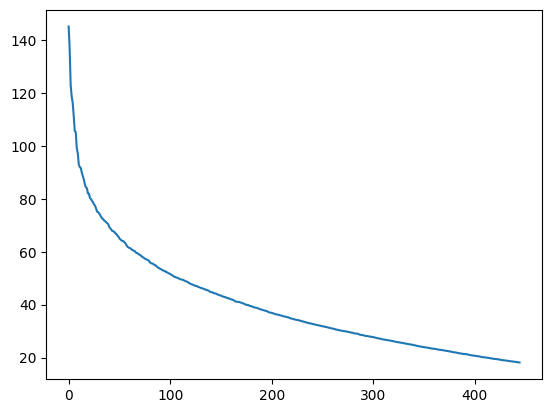

In [29]:
plt.figure()
plt.plot(s[5:450])
plt.show()

In [31]:
k = np.random.randint(0,X.shape[1])
print(k)
Y = predict(Y,k)
Y[i,j]

6354


4.0

In [ ]:
X[i,j]

2.5

In [33]:
accuracy = []
from tqdm import tqdm
for n in tqdm(range(1,11)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 50*n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    accuracy.append(d)
    save_to_csv(k, d)

accuracy

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
 10%|█         | 1/10 [00:10<01:36, 10.75s/it]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
 20%|██        | 2/10 [00:21<01:23, 10.50s/it]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': i

[{'Aleatório': 3,
  'Estimado': 0.00434,
  'Correto': 2.5,
  'Diferença': -2.49566,
  'K': 50},
 {'Aleatório': 5,
  'Estimado': 0.08007,
  'Correto': 2.5,
  'Diferença': -2.41993,
  'K': 100},
 {'Aleatório': 3,
  'Estimado': 0.0961,
  'Correto': 2.5,
  'Diferença': -2.4039,
  'K': 150},
 {'Aleatório': 3,
  'Estimado': 0.15701,
  'Correto': 2.5,
  'Diferença': -2.34299,
  'K': 200},
 {'Aleatório': 5,
  'Estimado': 0.56655,
  'Correto': 2.5,
  'Diferença': -1.9334500000000001,
  'K': 250},
 {'Aleatório': 5,
  'Estimado': 1.0456,
  'Correto': 2.5,
  'Diferença': -1.4544,
  'K': 300},
 {'Aleatório': 5,
  'Estimado': 1.39023,
  'Correto': 2.5,
  'Diferença': -1.10977,
  'K': 350},
 {'Aleatório': 2,
  'Estimado': 1.09177,
  'Correto': 2.5,
  'Diferença': -1.40823,
  'K': 400},
 {'Aleatório': 4,
  'Estimado': 2.41842,
  'Correto': 2.5,
  'Diferença': -0.08158000000000021,
  'K': 450},
 {'Aleatório': 2,
  'Estimado': 1.8422,
  'Correto': 2.5,
  'Diferença': -0.6577999999999999,
  'K': 500}]

In [40]:
accuracy

[{'Aleatório': 3,
  'Estimado': 0.00434,
  'Correto': 2.5,
  'Diferença': -2.49566,
  'K': 50},
 {'Aleatório': 5,
  'Estimado': 0.08007,
  'Correto': 2.5,
  'Diferença': -2.41993,
  'K': 100},
 {'Aleatório': 3,
  'Estimado': 0.0961,
  'Correto': 2.5,
  'Diferença': -2.4039,
  'K': 150},
 {'Aleatório': 3,
  'Estimado': 0.15701,
  'Correto': 2.5,
  'Diferença': -2.34299,
  'K': 200},
 {'Aleatório': 5,
  'Estimado': 0.56655,
  'Correto': 2.5,
  'Diferença': -1.9334500000000001,
  'K': 250},
 {'Aleatório': 5,
  'Estimado': 1.0456,
  'Correto': 2.5,
  'Diferença': -1.4544,
  'K': 300},
 {'Aleatório': 5,
  'Estimado': 1.39023,
  'Correto': 2.5,
  'Diferença': -1.10977,
  'K': 350},
 {'Aleatório': 2,
  'Estimado': 1.09177,
  'Correto': 2.5,
  'Diferença': -1.40823,
  'K': 400},
 {'Aleatório': 4,
  'Estimado': 2.41842,
  'Correto': 2.5,
  'Diferença': -0.08158000000000021,
  'K': 450},
 {'Aleatório': 2,
  'Estimado': 1.8422,
  'Correto': 2.5,
  'Diferença': -0.6577999999999999,
  'K': 500}]

In [41]:
d = dict()

rating = np.random.randint(1,6)

i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating

k = 400

Y = predict(Y,k)
d['Aleatório'] = rating
d['Estimado'] = Y[i,j]
d['Correto'] = X[i,j]
d['Diferença'] = Y[i,j]-X[i,j]
d['K'] = k
d

{'Aleatório': 4,
 'Estimado': 1.82957,
 'Correto': 2.5,
 'Diferença': -0.6704300000000001,
 'K': 400}

In [42]:
accuracy = []
from tqdm import tqdm
for n in tqdm(range(1,101)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 350+n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    accuracy.append(d)
    save_to_csv(k, d)

accuracy

  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  1%|          | 1/100 [00:08<14:26,  8.76s/it]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  2%|▏         | 2/100 [00:18<15:01,  9.20s/it]/var/folders/8p/rd093x_n5d11j0n2nz5zfzhh0000gn/T/ipykernel_71996/885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado'

KeyboardInterrupt: 

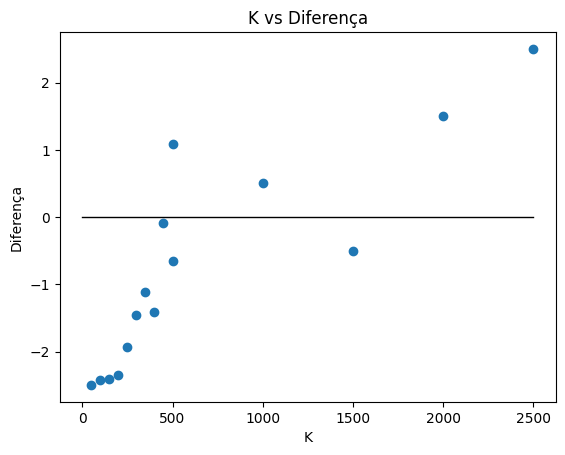

In [ ]:

df = pd.read_csv('results.csv')
plt.plot([0, 2500], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('K vs Diferença')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df['K'], df['Diferença'])
plt.show()
